In [2]:
from variable.variable import Variable
from activation_functions.relu import ReLUActivation
relu_fn = ReLUActivation()

In [3]:
x = Variable(3)
y = Variable(4)

In [4]:
z = x + y 

In [5]:
x = Variable([[1, 2, 3], [4, 5, 6]])
y = Variable([[2, 3, 4], [5, 6, 7]])

z = x + y


In [7]:
from loss_functions.cce import CategoricalCrossEntropy

cce = CategoricalCrossEntropy()

prediction = Variable([[0.1, 0.2, 0.7], [0.7, 0.2, 0.1]], requires_grad=False)
target = Variable([[1, 0, 0], [0, 0, 1]], requires_grad=False)

loss = cce(prediction, target)
print(loss)
## Should be 2.3

Loss: 2.3025850929940455


In [6]:
from models.simple_model import SimpleModel
input_size = 3
hidden_size = 10
output_size = 1


model = SimpleModel(input_size, hidden_size, output_size)

In [7]:
from optimizer.sgd import SGDOptimizer
from loss_functions.mse import MSELoss
from variable.variable import Variable
import random

loss_fn = MSELoss()

optimizer = SGDOptimizer(model.parameters(), learning_rate=0.0001)

losses = []
#let's feed random input and make the model always output 0

for i in range(100):
    x = [[Variable(random.randint(0, 10)) for i in range(input_size)]]
    y = [[Variable(0)]]
    output = model(x)
    loss = loss_fn(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    losses.append(loss.loss)


Loss: 2111.2009791945597
Loss: 313.2768250131763
Loss: 1532.056691560392
Loss: 471.58514161228237
Loss: 121.132187221137
Loss: 206.89532003487182
Loss: 371.049545427131
Loss: 1198.9681117761472
Loss: 124.02277456920018
Loss: 610.2916995907882
Loss: 261.6382428802366
Loss: 108.93405365115362
Loss: 56.76781495676459
Loss: 97.96991160270306
Loss: 140.97039501877006
Loss: 178.4460229776374
Loss: 51.37210512521582
Loss: 22.94552329571999
Loss: 15.177205327319209
Loss: 23.190225740518155
Loss: 21.097793313336883
Loss: 23.64400740832469
Loss: 28.06646228865306
Loss: 8.210502836710019
Loss: 2.534484878953743
Loss: 3.112104282740161
Loss: 7.648296640912237
Loss: 14.555263914307456
Loss: 3.507150378361712
Loss: 4.9935360438628855
Loss: 3.7931032863586602
Loss: 4.969563094394982
Loss: 10.080062983053189
Loss: 6.30075130452035
Loss: 14.409443981288959
Loss: 2.260763184899315
Loss: 3.1457359895738297
Loss: 7.1532428896732405
Loss: 2.7366536756447175
Loss: 1.2562611703445077
Loss: 2.9072409209515304

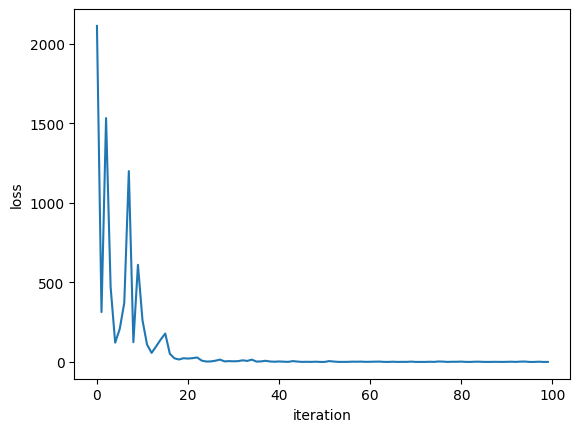

In [8]:
#plot the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

